In [2]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import random
from copy import deepcopy

In [2]:
data = []
with open('data_file.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for r in reader:
        data.append(r)

In [3]:
# Removing null values
data2 = []
for rec in data:
    if rec['start_time'] == "None" or rec['end_time'] == "None":
#         print(rec)
        pass
    else:
        data2.append(rec)
    
data = data2

In [ ]:
# sampling down
print(len(data))
data3 = deepcopy(data)
data = []
print(len(data), len(data3))

In [ ]:
print(len(data))
data = data[:10001]
print(len(data))

In [ ]:
for rec in data3:
    if random.random() < 0.13:
        data.append(rec)
        
print(len(data), len(data3))

In [4]:
# converted string to list
for rec in data:
    rec['gpus'] = list(map(lambda x: x.strip("''") ,rec['gpus'].strip('[]').split(", ")))

In [5]:
# counting gpus
for rec in data:
    rec['num_gpu'] = len(rec['gpus'])

In [6]:
# remove 128 gpu required jobs
data2 = []
for rec in data:
    if rec['num_gpu'] < 128:
        data2.append(rec)

data = data2

In [7]:
# calculating duration
for rec in data:
    rec['job_id'] = rec['jobid']
    rec['start_time'] = datetime.strptime(rec['start_time'], '%Y-%m-%d %H:%M:%S')
    rec['end_time'] = datetime.strptime(rec['end_time'], '%Y-%m-%d %H:%M:%S')
    rec['submitted_time'] = datetime.strptime(rec['submitted_time'], '%Y-%m-%d %H:%M:%S')

In [8]:
for rec in data:
    rec['duration'] = (rec['end_time']-rec['start_time']).seconds
    
print(data[0])

{'jobid': 'application_1506638472019_17235', 'start_time': datetime.datetime(2017, 10, 9, 7, 2, 5), 'end_time': datetime.datetime(2017, 10, 9, 7, 3, 11), 'submitted_time': datetime.datetime(2017, 10, 9, 7, 1, 55), 'user': '066e99', 'gpus': ['gpu0'], 'num_gpu': 1, 'job_id': 'application_1506638472019_17235', 'duration': 66}


In [9]:
print(data[0]['submitted_time'])

data.sort(key = lambda x: x['submitted_time'])

print(data[0]['submitted_time'])

2017-10-09 07:01:55
2017-09-08 06:01:21


In [10]:
data[0]['submit_time'] = 0 
for i in range(1, len(data)):
    data[i]['submit_time'] = (data[i]['submitted_time'] - data[i-1]['submitted_time']).seconds + data[i-1]['submit_time']
    

In [11]:
for i in range(len(data)-1):
    data[i]['interval'] = data[i+1]['submit_time'] - data[i]['submit_time']
    
data[-1]['interval'] = 0

In [12]:
for rec in data:
    del rec['start_time']
    del rec['end_time']
    del rec['submitted_time']
    del rec['user']
    del rec['gpus']
    del rec['jobid']

In [ ]:
print(data[9])
print(data[10])

In [13]:
for rec in data:
    rec['submit_time'] //= 60
    rec['interval'] //= 60
    

In [14]:
m_names = ['vgg19', 'vgg16', 'vgg11', 'alexnet', 'resnet101', 'resnet50', 'inception4', 'inception3']
for rec in data:
    if rec['duration'] > 55000:
        rec['model_name'] = 'resnet152'
    else:
        rec['model_name'] = random.choice(m_names)

print(data[0])

{'num_gpu': 1, 'job_id': 'application_1504131676014_4140', 'duration': 17779, 'submit_time': 0, 'interval': 80, 'model_name': 'vgg19'}


In [15]:
keys = data[0].keys()

a_file = open("sampled_clean_data.csv", "w")
dict_writer = csv.DictWriter(a_file, keys)
dict_writer.writeheader()
dict_writer.writerows(data)
a_file.close()

In [3]:
clean_data = []
with open('clean_data.csv', newline='') as csvfile2:
    reader2 = csv.DictReader(csvfile2)
    for r in reader2:
        clean_data.append(r)

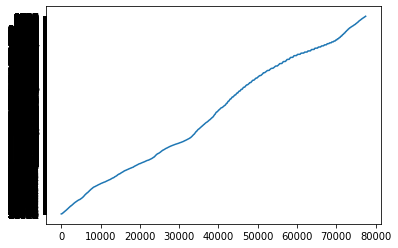

In [5]:
dur = []
for rec in clean_data:
    dur.append(rec['duration'])

plt.plot(sorted(dur))

In [ ]:
# len(data)
max(rec['num_gpu'] for rec in data)


## Taking first 10k jobs and filtering by num_GPU < 128

In [6]:
data2 = []
for rec in data:
    if rec['num_gpu'] < 128:
        data2.append(rec)
    
print(len(data))
print(len(data2))

NameError: name 'data' is not defined

In [27]:
from collections import defaultdict
print(len(clean_data))

numGPU = defaultdict(int)
jobs_1gpu = []
jobs_other = []
print(clean_data[0])
print("\n")
for c in clean_data:
    numGPU[c['num_gpu']] += 1
    if c['num_gpu'] == '1':
        jobs_1gpu.append(c)
    elif int(c['num_gpu']) < 128:
        jobs_other.append(c)
print(numGPU)

final_jobs = [x for x in jobs_other]
for x in jobs_1gpu:
    final_jobs.append(x)
    if len(final_jobs) == 10000:
        break
print(len(final_jobs))

final_jobs.sort(key = lambda x: int(x['submit_time']))

for i in range(len(final_jobs)):
    final_jobs[i]['submit_time'] = clean_data[i]['submit_time']

numG = defaultdict(int)
for c in final_jobs:
    numG[c['num_gpu']] += 1

print(numG)

keys = clean_data[0].keys()

a_file = open("all_gpu_data.csv", "w")
dict_writer = csv.DictWriter(a_file, keys)
dict_writer.writeheader()
dict_writer.writerows(final_jobs)
a_file.close()

77466
{'num_gpu': '1', 'job_id': 'application_1504131676014_4140', 'duration': '17779', 'submit_time': '0', 'interval': '4805', 'model_name': 'vgg16'}


defaultdict(<class 'int'>, {'1': 72760, '4': 1494, '8': 1265, '16': 144, '2': 1735, '32': 52, '12': 4, '24': 4, '64': 5, '128': 3})
10000
defaultdict(<class 'int'>, {'1': 5297, '4': 1494, '8': 1265, '16': 144, '2': 1735, '32': 52, '24': 4, '12': 4, '64': 5})


In [28]:
print(len(final_jobs))

10000
